Dataset link: [Superstore Dataset](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)

Analyzed by Adin Rama Ariyanto Putra

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

In [2]:
# Mengabaikan warning yang tidak perlu
warnings.filterwarnings('ignore')

In [3]:
# Mengatur style visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## **1. Data Loading**

In [ ]:
from google.colab import files
files.upload()

In [5]:
# Mengunduh dataset "Superstore Dataset" dari Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d vivek468/superstore-dataset-final
!unzip superstore-dataset-final.zip

Dataset URL: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final
License(s): other
Archive:  superstore-dataset-final.zip
  inflating: Sample - Superstore.csv  


In [6]:
# Memuat dataset
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## **2. Basic Information Exploration**

In [7]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [8]:
# Melihat dimensi dataset
print(f'Jumlah baris dan kolom: {df.shape}')

Jumlah baris dan kolom: (9994, 21)


In [9]:
# Memeriksa nilai yang hilang
print('Jumlah nilai yang hilang di setiap kolom:')
df.isnull().sum()

Jumlah nilai yang hilang di setiap kolom:


,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [10]:
# Melihat statistik deskriptif
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,9/5/2016,12/16/2015,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32063.693350,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


## **3. Data Preprocessing**

In [11]:
# Konversi kolom "Order Date" dan "Ship Date" menjadi datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [12]:
# Membuat kolom baru untuk analisis
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.month_name()
df['Ship Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [13]:
print(f'Kolom dalam dataset setelah preprocessing: {df.columns.tolist()}')

Kolom dalam dataset setelah preprocessing: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year', 'Order Month', 'Order Month Name', 'Ship Days']


## **4. Univariate Analysis**

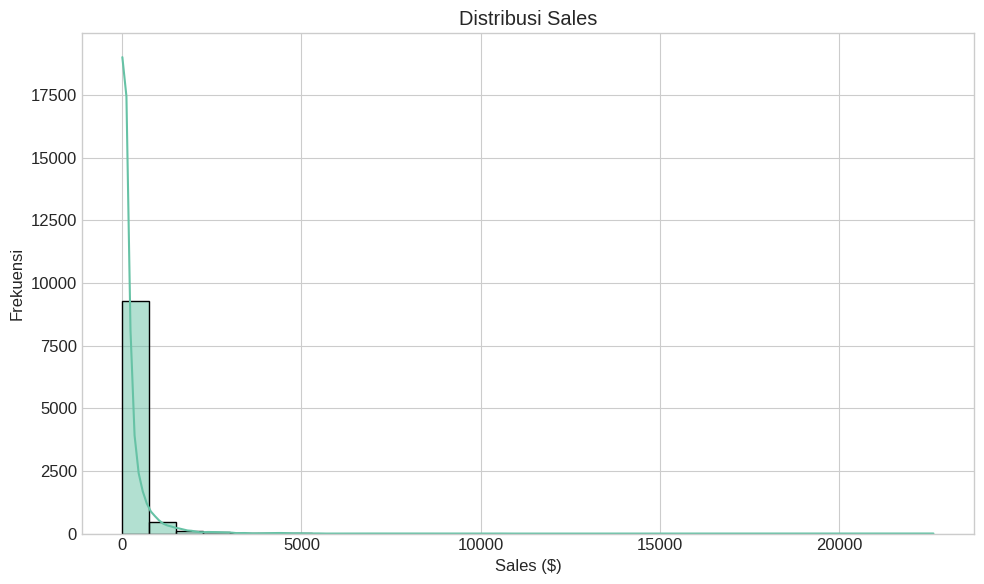

In [14]:
# Melihat distribusi sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title('Distribusi Sales')
plt.xlabel('Sales ($)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

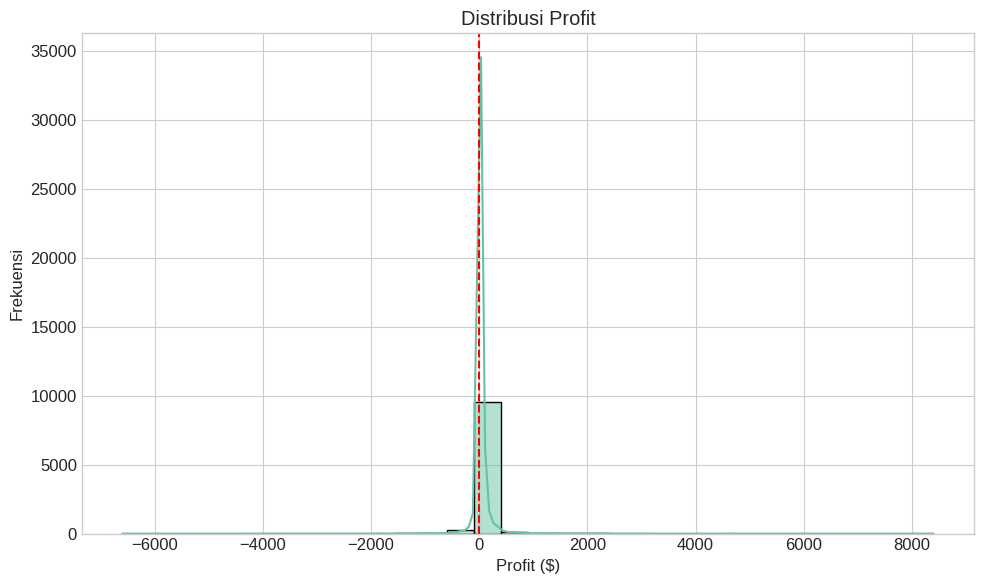

In [15]:
# Melihat distribusi profit
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], kde=True, bins=30)
plt.title('Distribusi Profit')
plt.xlabel('Profit ($)')
plt.ylabel('Frekuensi')
plt.axvline(x=0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

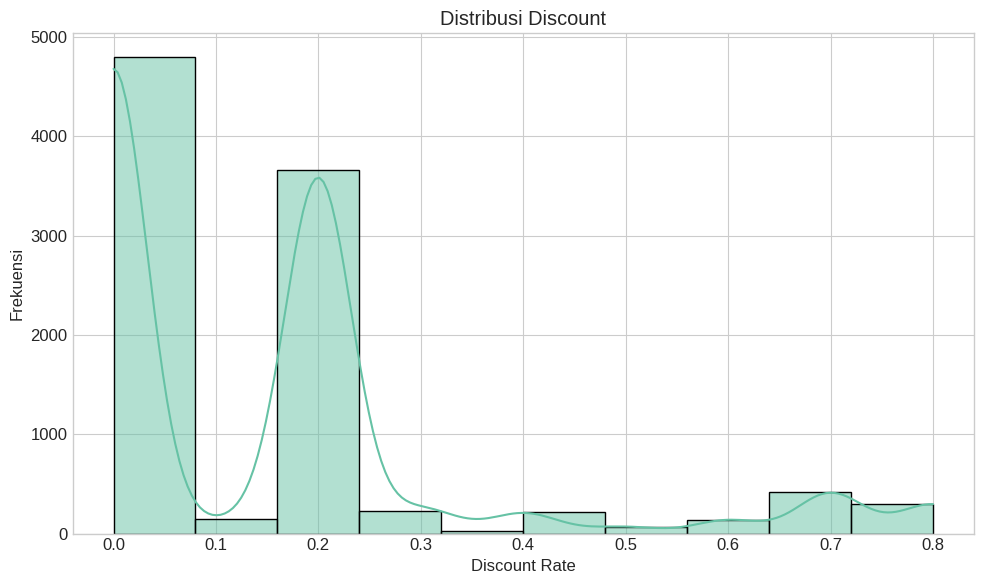

In [16]:
# Melihat distribusi discount
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount'], kde=True, bins=10)
plt.title('Distribusi Discount')
plt.xlabel('Discount Rate')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

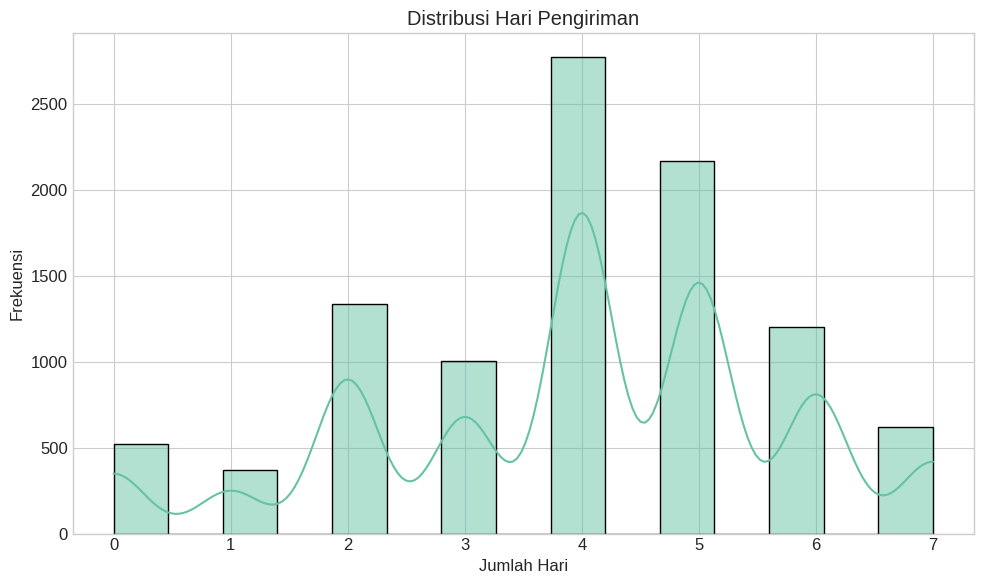

In [17]:
# Melihat distribusi ship days
plt.figure(figsize=(10, 6))
sns.histplot(df['Ship Days'], kde=True, bins=15)
plt.title('Distribusi Hari Pengiriman')
plt.xlabel('Jumlah Hari')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

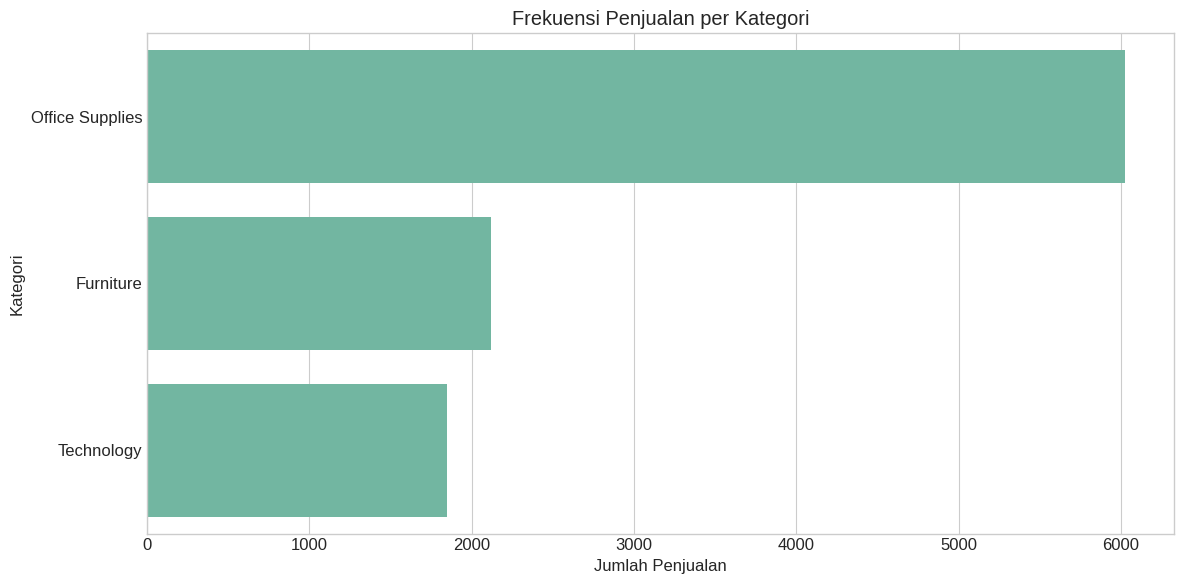

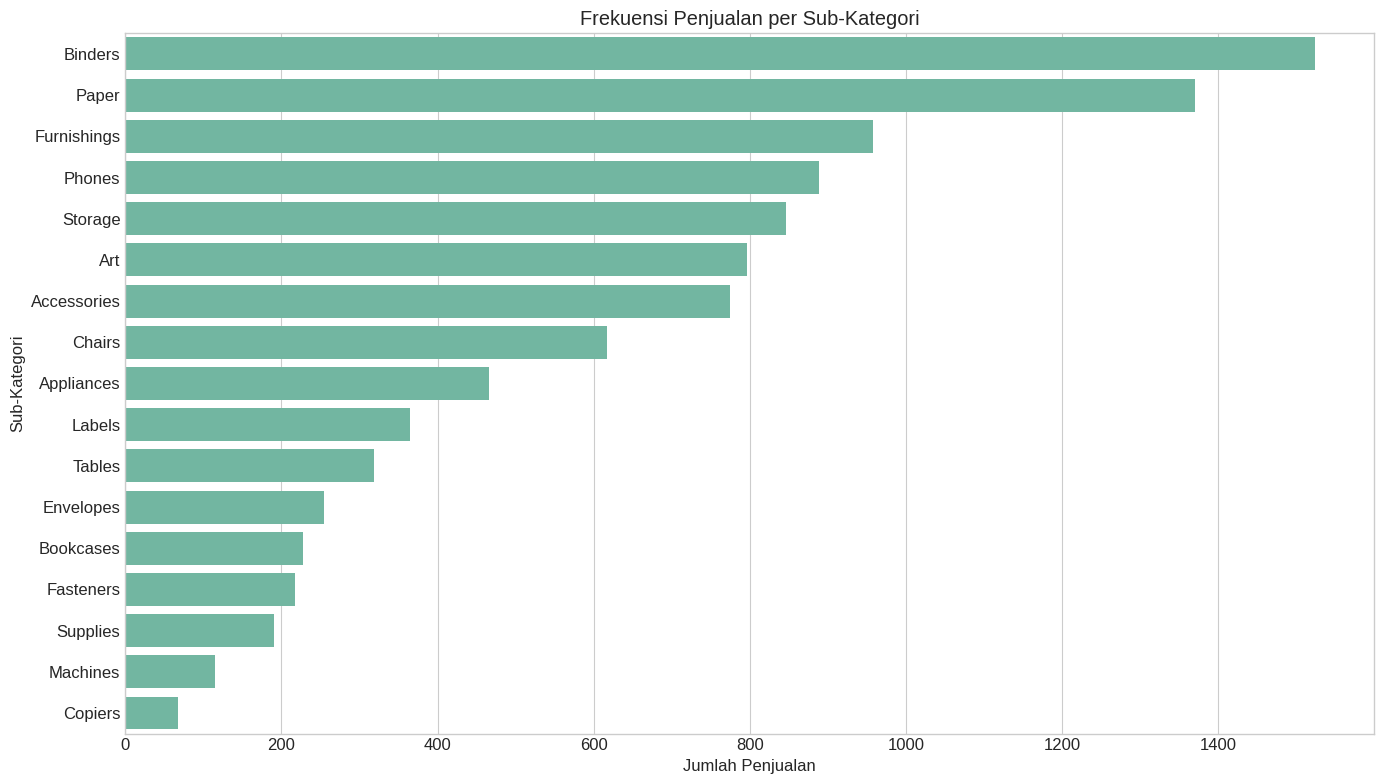

In [18]:
# Melihat distribusi frekuensi kategori dan sub-kategori

plt.figure(figsize=(12, 6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index)
plt.title('Frekuensi Penjualan per Kategori')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Kategori')
plt.tight_layout()
plt.show()

print('\n')

plt.figure(figsize=(14, 8))
sns.countplot(y=df['Sub-Category'], order=df['Sub-Category'].value_counts().index)
plt.title('Frekuensi Penjualan per Sub-Kategori')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Sub-Kategori')
plt.tight_layout()
plt.show()

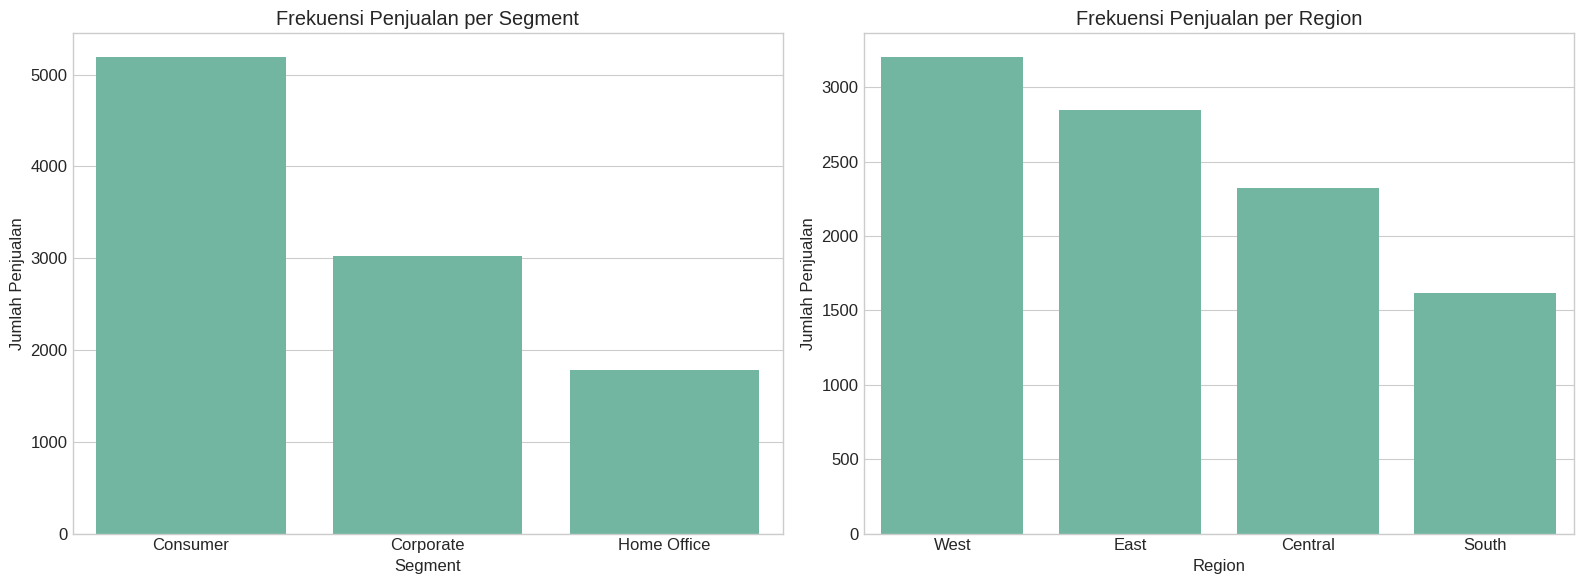

In [19]:
# Melihat frekuensi segment dan region

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x=df['Segment'], order=df['Segment'].value_counts().index, ax=ax[0])
ax[0].set_title('Frekuensi Penjualan per Segment')
ax[0].set_xlabel('Segment')
ax[0].set_ylabel('Jumlah Penjualan')

sns.countplot(x=df['Region'], order=df['Region'].value_counts().index, ax=ax[1])
ax[1].set_title('Frekuensi Penjualan per Region')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Jumlah Penjualan')

plt.tight_layout()
plt.show()

## **5. Multivariate Analysis**

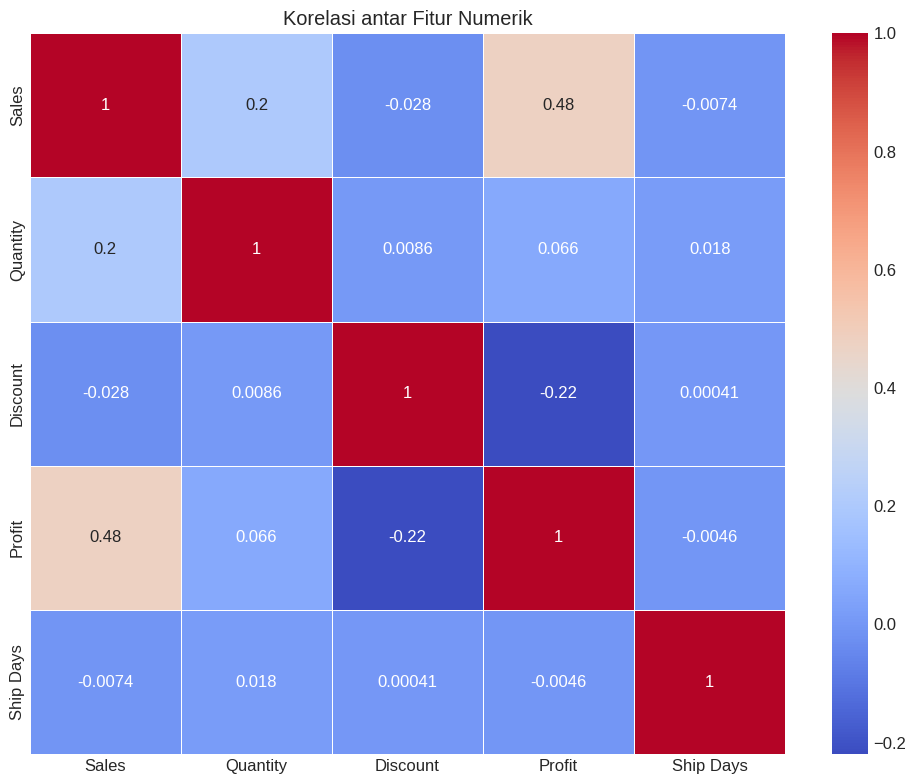

In [20]:
# Melihat korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
num_features = ['Sales', 'Quantity', 'Discount', 'Profit', 'Ship Days']
corr_matrix = df[num_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi antar Fitur Numerik')
plt.tight_layout()
plt.show()

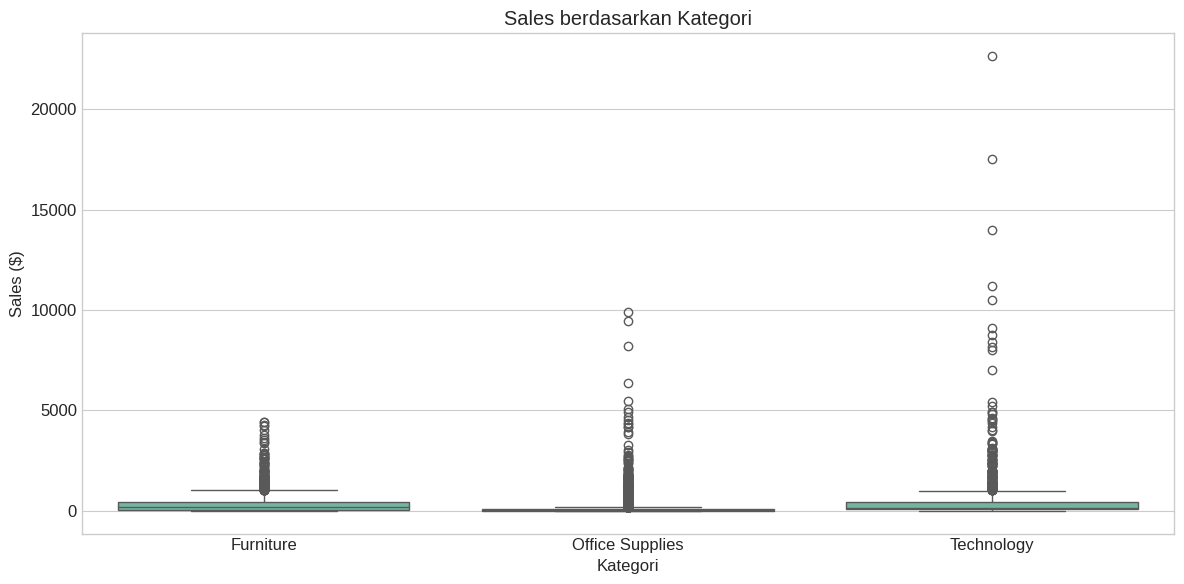

In [21]:
# Melihat sales berdasarkan kategori
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Sales', data=df)
plt.title('Sales berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Sales ($)')
plt.tight_layout()
plt.show()

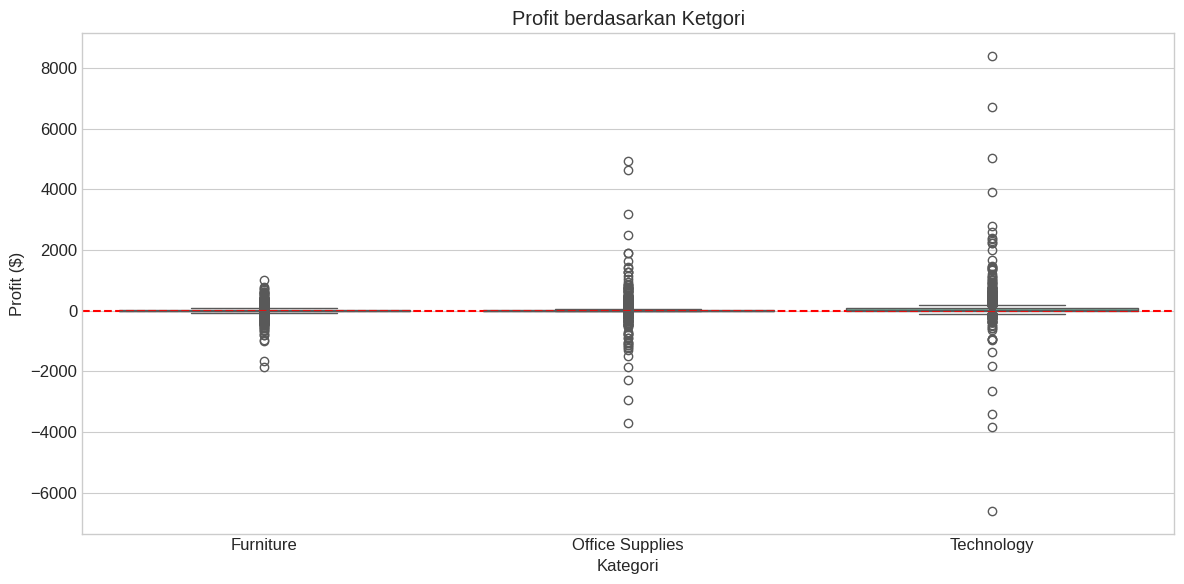

In [22]:
# Melihat profit berdasarkan ketgori
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title('Profit berdasarkan Ketgori')
plt.xlabel('Kategori')
plt.ylabel('Profit ($)')
plt.axhline(y=0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

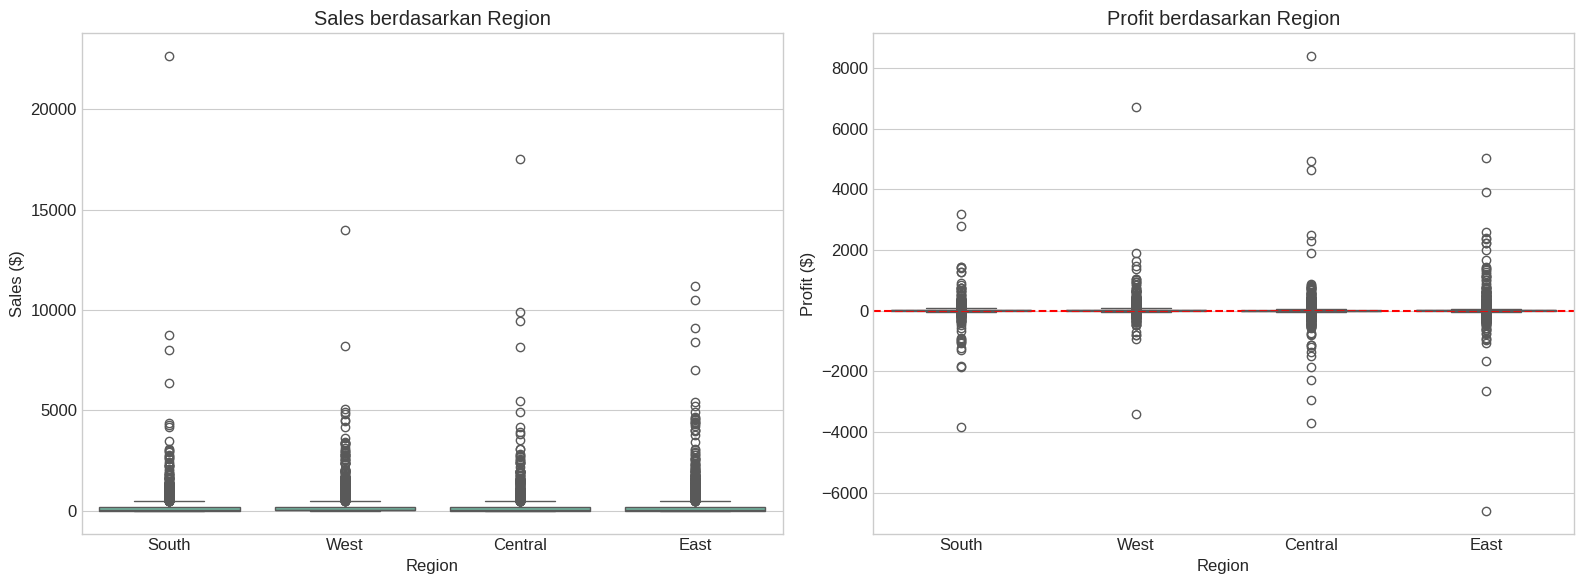

In [23]:
# Melihat sales dan profit berdasarkan region

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='Region', y='Sales', data=df, ax=ax[0])
ax[0].set_title('Sales berdasarkan Region')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Sales ($)')

sns.boxplot(x='Region', y='Profit', data=df, ax=ax[1])
ax[1].set_title('Profit berdasarkan Region')
ax[1].set_xlabel('Region')
ax[1].set_ylabel('Profit ($)')
ax[1].axhline(y=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

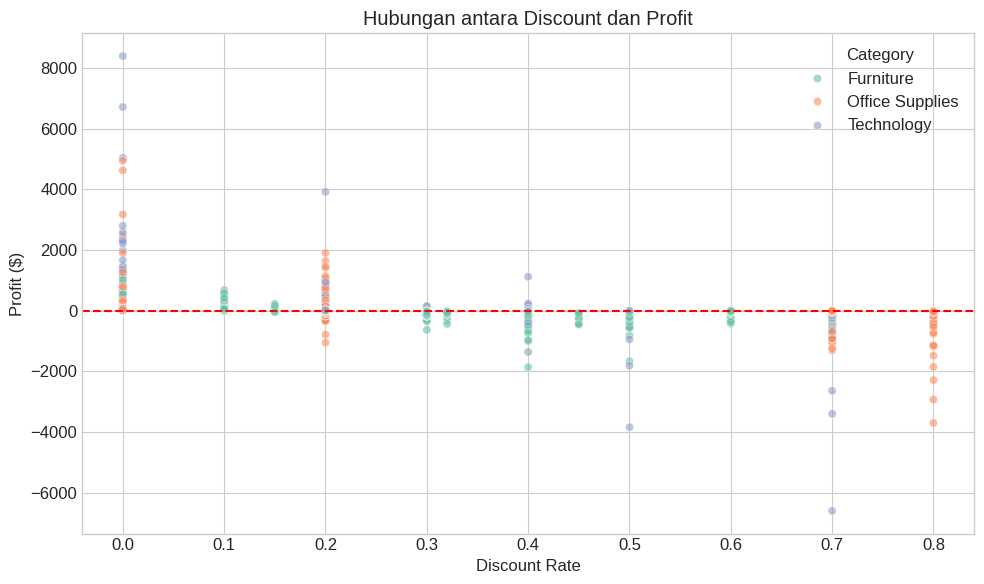

In [24]:
# Melihat hubungan antara discount dan profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', hue='Category', data=df, alpha=0.6)
plt.title('Hubungan antara Discount dan Profit')
plt.xlabel('Discount Rate')
plt.ylabel('Profit ($)')
plt.axhline(y=0, color='red', linestyle='--')
plt.tight_layout()
plt.show()

## **6. Exploratory Data Analysis (EDA)**

* Melihat tren penjualan per bulan

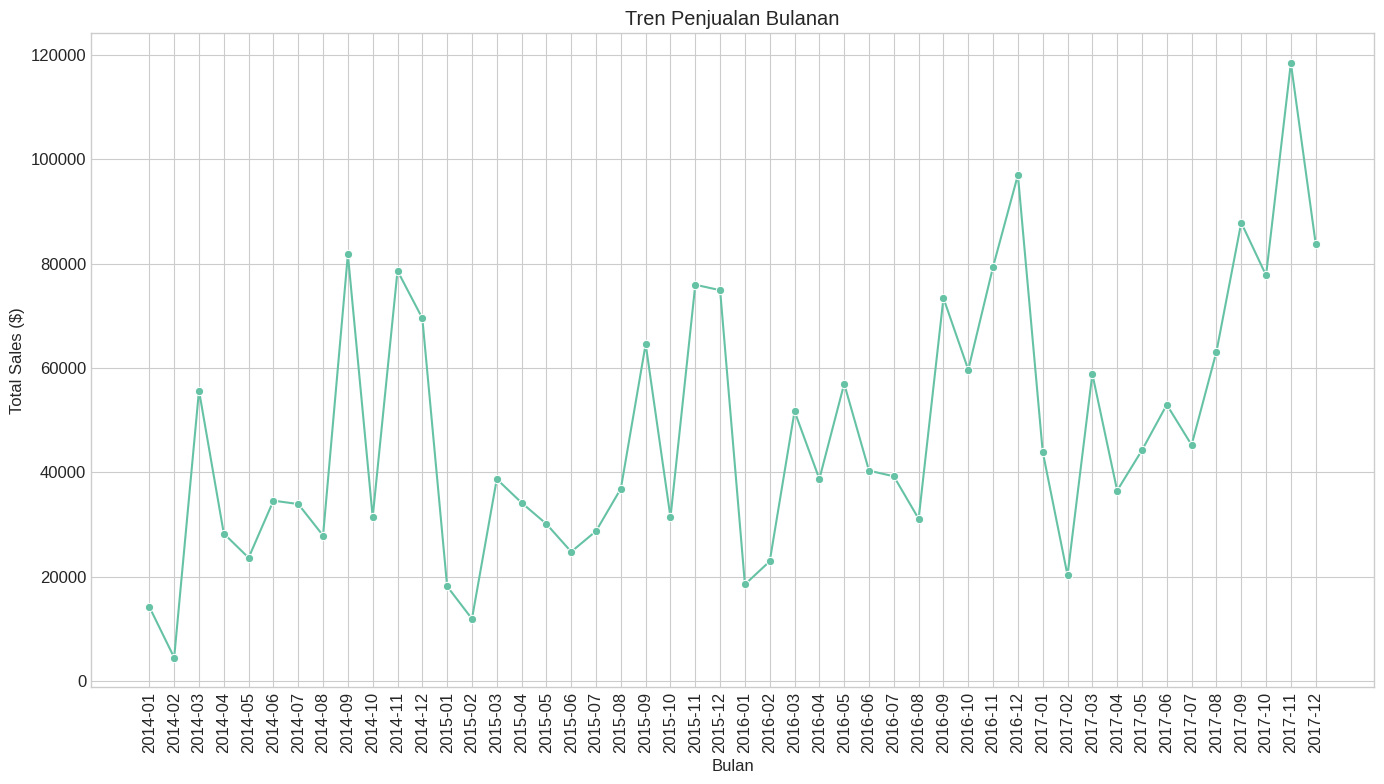

In [25]:
# Agregasi data bulanan
monthly_sales = df.groupby(['Order Year', 'Order Month', 'Order Month Name'])['Sales'].sum().reset_index()
monthly_sales['Year Month'] = monthly_sales['Order Year'].astype(str) + '-' + monthly_sales['Order Month'].astype(str).str.zfill(2)
monthly_sales = monthly_sales.sort_values('Year Month')

plt.figure(figsize=(14, 8))
sns.lineplot(x='Year Month', y='Sales', data=monthly_sales, marker='o')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* Melihat produk dengan performa terbaik dan terburuk

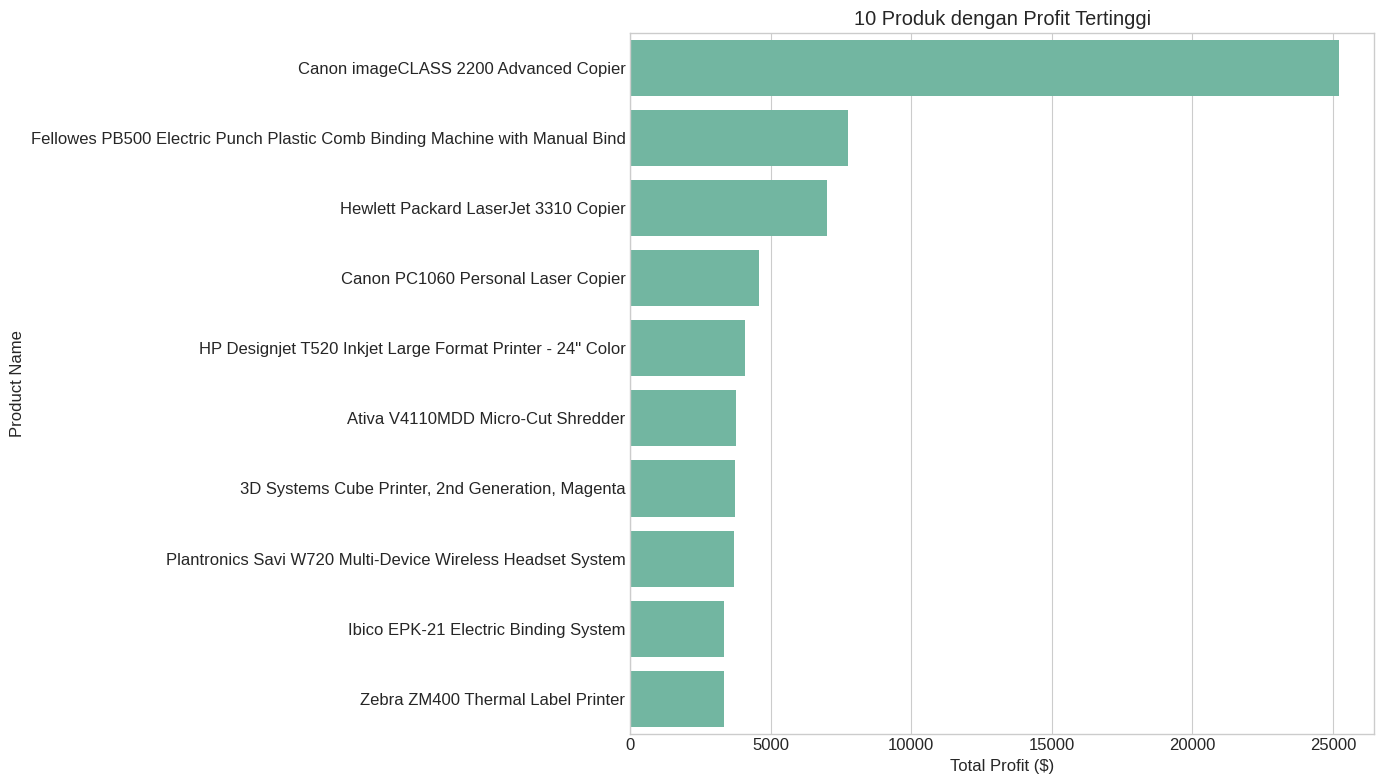

In [26]:
# Top 10 produk dengan profit tertinggi
top_products = df.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values('Profit', ascending=False).head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_products['Profit'], y=top_products.index)
plt.title('10 Produk dengan Profit Tertinggi')
plt.xlabel('Total Profit ($)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

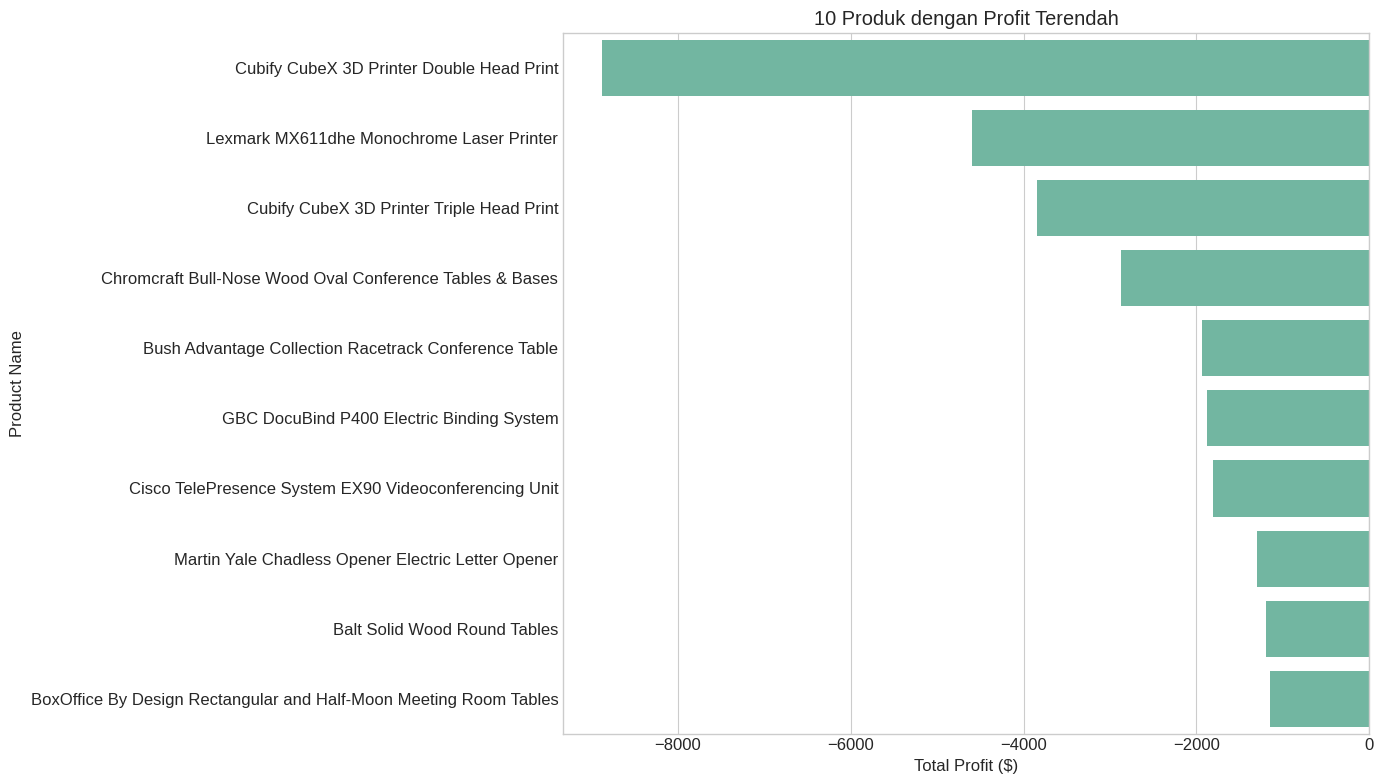

In [27]:
# Bottom 10 produk dengan profit terendah
bottom_products = df.groupby('Product Name')[['Sales', 'Profit']].sum().sort_values('Profit').head(10)
plt.figure(figsize=(14, 8))
sns.barplot(x=bottom_products['Profit'], y=bottom_products.index)
plt.title('10 Produk dengan Profit Terendah')
plt.xlabel('Total Profit ($)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

* Optimasi pengiriman dan logistik

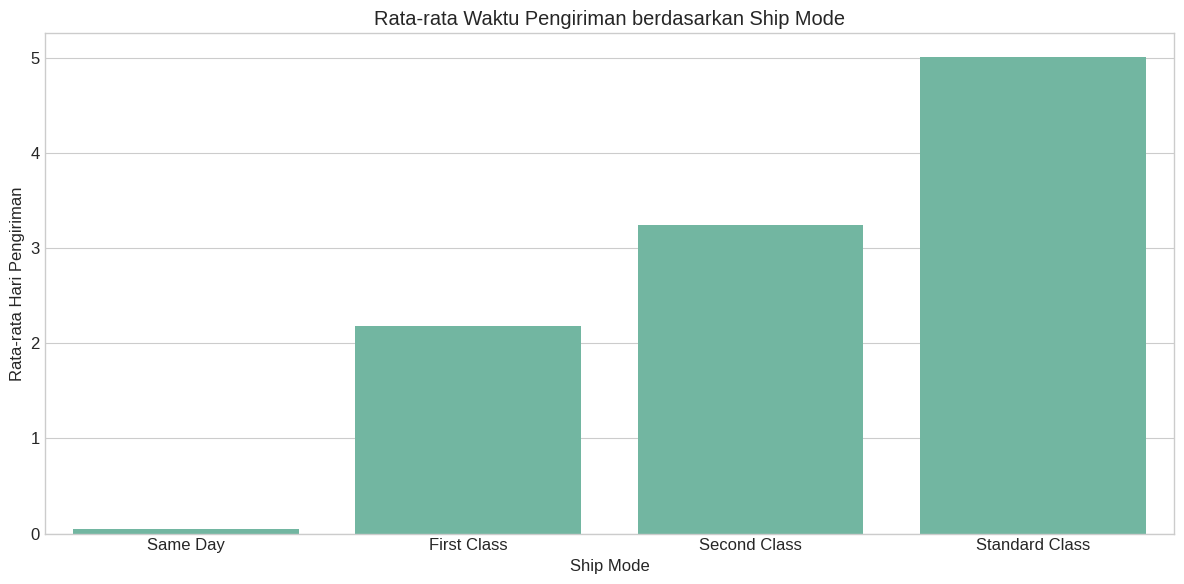

In [28]:
# Melihat rata-rata waktu pengiriman berdasarkan ship mode
ship_mode_days = df.groupby('Ship Mode')['Ship Days'].mean().sort_values().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Ship Mode', y='Ship Days', data=ship_mode_days)
plt.title('Rata-rata Waktu Pengiriman berdasarkan Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Rata-rata Hari Pengiriman')
plt.tight_layout()
plt.show()

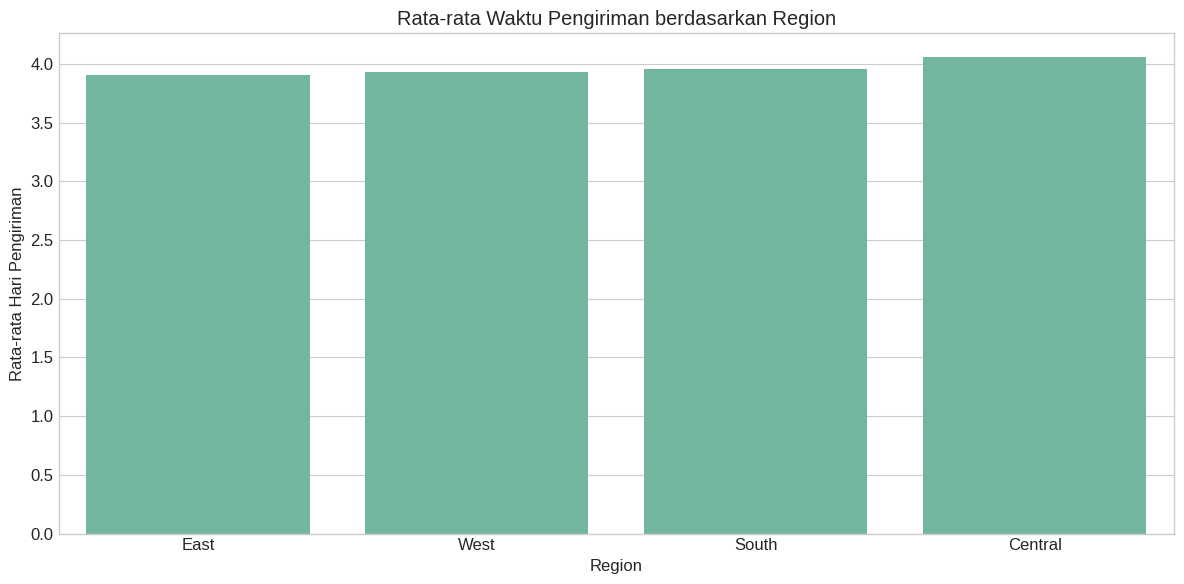

In [29]:
# Melihat rata-rata waktu pengiriman berdasarkan region
ship_region_days = df.groupby('Region')['Ship Days'].mean().sort_values().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Ship Days', data=ship_region_days)
plt.title('Rata-rata Waktu Pengiriman berdasarkan Region')
plt.xlabel('Region')
plt.ylabel('Rata-rata Hari Pengiriman')
plt.tight_layout()
plt.show()

* Segmentasi pelanggan menggunakan analisis RFM (Recency, Frequency, & Monetray)

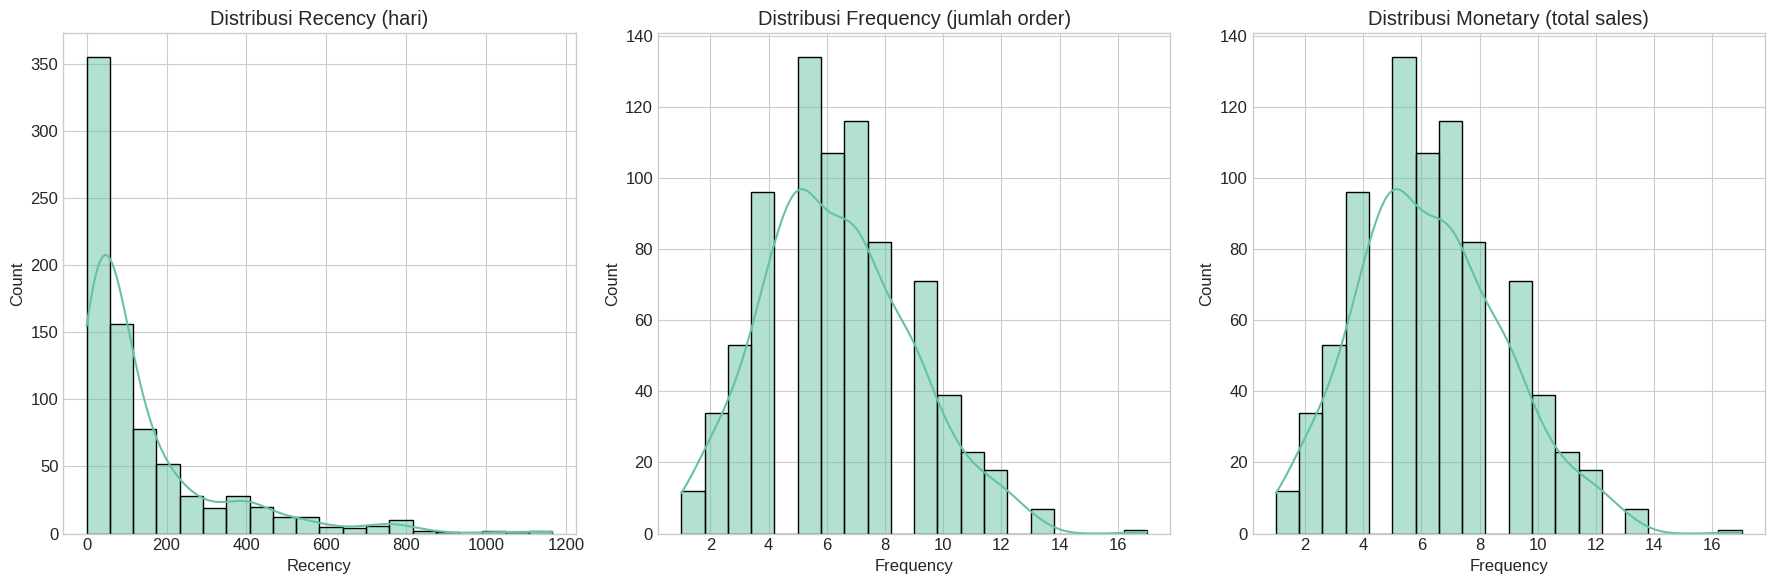

In [30]:
# Menggunakan tanggal terakhir dalam dataset sebagai "sekarang"
current_date = df['Order Date'].max()

# Aggregate data pelanggan
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (current_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
}).reset_index()

# Rename kolom
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Plot distribusi RFM
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(rfm['Recency'], kde=True, bins=20, ax=ax[0])
ax[0].set_title('Distribusi Recency (hari)')

sns.histplot(rfm['Frequency'], kde=True, bins=20, ax=ax[1])
ax[1].set_title('Distribusi Frequency (jumlah order)')

sns.histplot(rfm['Frequency'], kde=True, bins=20, ax=ax[2])
ax[2].set_title('Distribusi Monetary (total sales)')

plt.tight_layout()
plt.show()

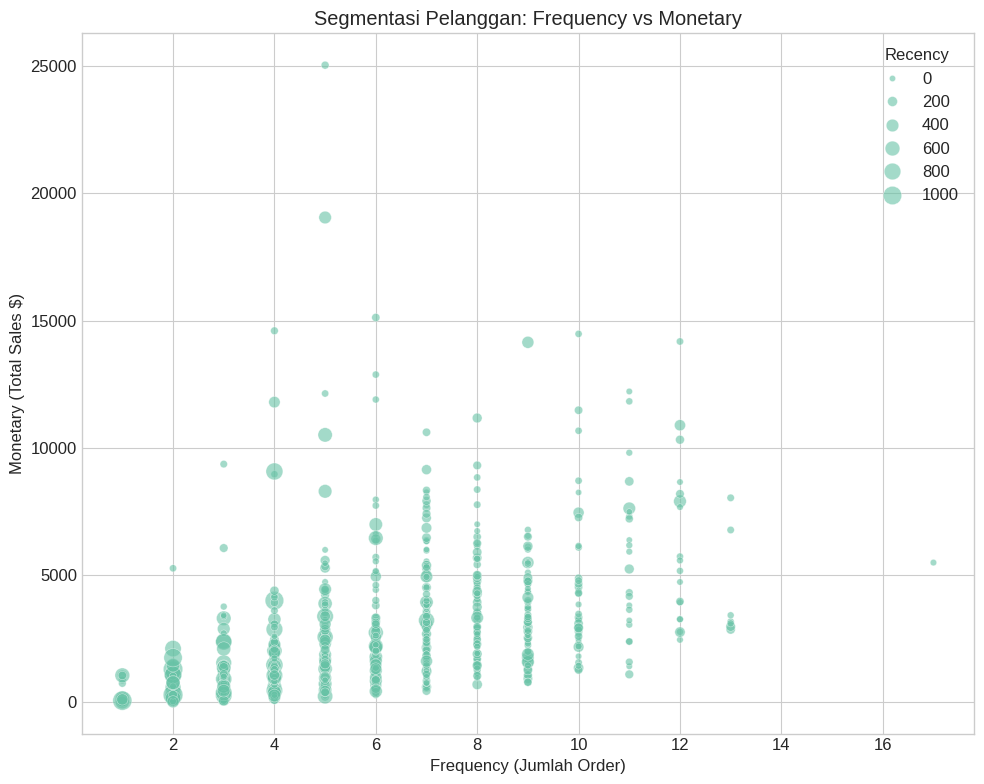

In [31]:
# Melihat hubungan antara frequency dan monetary
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Frequency', y='Monetary', size='Recency', data=rfm, sizes=(20, 200), alpha=0.6)
plt.title('Segmentasi Pelanggan: Frequency vs Monetary')
plt.xlabel('Frequency (Jumlah Order)')
plt.ylabel('Monetary (Total Sales $)')
plt.tight_layout()
plt.show()

## **7. Results and Discussion**

* Analisis tren penjualan per bulan

In [32]:
# Tren penjualan per tahun
yearly_sales = df.groupby('Order Year')['Sales'].sum()
print(f'Total penjualan per tahun:\n{yearly_sales}')

Total penjualan per tahun:
Order Year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64


In [33]:
# Tren penjualan per bulan
monthly_avg = df.groupby('Order Month Name')['Sales'].sum()
top_month = monthly_avg.idxmax()
bottom_month = monthly_avg.idxmin()
print(f'Bulan dengan penjualan tertinggi: {top_month} (${monthly_avg.max():.2f})')
print(f'Bulan dengan penjualan terendah: {bottom_month} (${monthly_avg.min():.2f})')

Bulan dengan penjualan tertinggi: November ($352461.07)
Bulan dengan penjualan terendah: February ($59751.25)


* Produk dengan performa terbaik dan terburuk

In [34]:
# Produk dengan performa terbaik dan terburuk
print(f'Top 5 produk dengan profit tertinggi:')
print(top_products.head(5)[['Profit']])

print(f'\n\nBottom 5 produk dengan profit terendah:')
print(bottom_products.head(5)[['Profit']])

Top 5 produk dengan profit tertinggi:
                                                        Profit
Product Name                                                  
Canon imageCLASS 2200 Advanced Copier               25199.9280
Fellowes PB500 Electric Punch Plastic Comb Bind...   7753.0390
Hewlett Packard LaserJet 3310 Copier                 6983.8836
Canon PC1060 Personal Laser Copier                   4570.9347
HP Designjet T520 Inkjet Large Format Printer -...   4094.9766


Bottom 5 produk dengan profit terendah:
                                                       Profit
Product Name                                                 
Cubify CubeX 3D Printer Double Head Print          -8879.9704
Lexmark MX611dhe Monochrome Laser Printer          -4589.9730
Cubify CubeX 3D Printer Triple Head Print          -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Table... -2876.1156
Bush Advantage Collection Racetrack Conference ... -1934.3976


In [35]:
# Analisis produk berdasarkan kategori
category_performance = df.groupby('Category')[['Sales', 'Profit']].sum()
print('Performa produk berdasarkan kategori:')
print(category_performance.sort_values('Profit', ascending=False))

Performa produk berdasarkan kategori:
                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Office Supplies  719047.0320  122490.8008
Furniture        741999.7953   18451.2728


* Optimasi pengiriman dan logistik

In [36]:
print('Rata-rata waktu pengiriman berdasarkan Ship Mode:')
print(ship_mode_days)

print('\nRata-rata waktu pengiriman berdasarkan Region:')
print(ship_region_days)

Rata-rata waktu pengiriman berdasarkan Ship Mode:
        Ship Mode  Ship Days
0        Same Day   0.044199
1     First Class   2.182705
2    Second Class   3.238046
3  Standard Class   5.006535

Rata-rata waktu pengiriman berdasarkan Region:
    Region  Ship Days
0     East   3.908708
1     West   3.929753
2    South   3.958025
3  Central   4.058115


* Segmentasi pelanggan

In [37]:
print('Statistik RFM:')
rfm.describe()

Statistik RFM:


,Recency,Frequency,Monetary
count,793.000000,793.000000,793.000000
mean,146.802018,6.316520,2896.848500
std,186.211051,2.550885,2628.670117
min,0.000000,1.000000,4.833000
25%,30.000000,5.000000,1146.050000
50%,75.000000,6.000000,2256.394000
75%,183.000000,8.000000,3785.276000
max,1165.000000,17.000000,25043.050000


In [38]:
# Menemukan top customers dengan "Monetary" tertinggi
top_customers = rfm.sort_values('Monetary', ascending=False).head(5)
print('Top 5 pelanggan berdasarkan nilai Monetary:')
top_customers

Top 5 pelanggan berdasarkan nilai Monetary:


,Customer ID,Recency,Frequency,Monetary
700,SM-20320,79,5,25043.050
741,TC-20980,399,5,19052.218
621,RB-19360,96,6,15117.339
730,TA-21385,69,4,14595.620
6,AB-10105,41,10,14473.571


In [39]:
# Menemukan top customers dengan "Frequency" tertinggi
loyal_customers = rfm.sort_values('Frequency', ascending=False).head(5)
print('Top 5 pelanggan berdasarkan nilai Frequency:')
loyal_customers

Top 5 pelanggan berdasarkan nilai Frequency:


,Customer ID,Recency,Frequency,Monetary
275,EP-13915,12,17,5478.0608
691,SH-19975,29,13,3406.8395
576,NS-18640,174,13,2964.8230
591,PG-18820,36,13,3086.9070
791,ZC-21910,54,13,8025.7070


## **8. Conclusion**

1. Tren Penjualan:
  - Terdapat variasi yang signifikan dalam penjualan bulanan.
  - Terlihat pola musiman dengan peningkatan pada bulan-bulan tertentu.

2. Produk:
  - Kategori **Technology** dan **Office Supplies** cenderung menghasilkan profit yang lebih tinggi.
  - Beberapa produk Furniture memiliki margin profit yang rendah atau bahkan negatif.

3. Pengiriman:
  - Modus pengiriman yang lebih cepat (Same Day/First Class) memiliki biaya lebih tinggi, namun juga menghasilkan profit per item yang lebih tinggi.
  - Region **Central** memiliki waktu pengiriman rata-rata tertinggi.

4. Segmentasi Pelanggan:
  - Sebagian besar nilai penjualan berasal dari sejumlah kecil pelanggan (prinsip Pareto).
  - Pelanggan dengan frekuensi order tinggi tidak selalu menghasilkan nilai penjualan tertinggi.

REKOMENDASI:
1. Fokus pada peningkatan penjualan selama bulan-bulan dengan penjualan rendah melalui promosi khusus.
2. Pertimbangkan untuk mengurangi varian atau meningkatkan harga pada produk dengan profit negatif.
3. Optimalkan jaringan pengiriman, terutama di region dengan waktu pengiriman lebih lama.
4. Buat program loyalitas untuk meningkatkan retensi pelanggan dan nilai belanja rata-rata per pelanggan.
5. Evaluasi strategi diskon karena beberapa tingkat diskon berkorelasi dengan penurunan profit.